# Version with full unit normalization


## Implementing the Leggett-Garg Inequality for Oscillating Neutral Mesons

This notebook compiles the code referenced in the report I wrote on this subject and is the source of any graphs.

Firstly, the imports:

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# The Equations

First, the equation [6] from the referenced paper for $C_{12}$ of the kaon and then the total $C$ from the definition of the Legett-Garg inequality.

In [3]:
## Setting up the inequalities

# Kaon Functions

# Eq. 6 from 1304.2761[quant-ph].
# t1, t2 have difference delta t; Yn = hbar / tau_n with tau in seconds
# --> units of e^-hbar since t cancels with tau units, cos(DM*t) = cos(m*t) with whatever mass units?
# Nope, epsilon unitless and dm in MeV in paper --> natural units
def C_12_kaon(t1, t2, YS, YL, DM, re_eps, abs_eps):
    Y = (YS + YL) / 2
    eps2 = abs_eps ** 2
    h1 = (
        1/2 * (1 + eps2) * (np.exp(-YL * t1) + np.exp(-YS * t1)) * np.exp(-Y * (t2 - t1)) * np.cos(DM * (t2 - t1)) +
        re_eps * np.exp(-Y * t1) * (np.exp(-YL * (t2 -t1)) + np.exp(-YS * (t2 - t1))) * np.cos(DM * t1)
    )
    h2 = (
        1/4 * (1 + eps2) * (np.exp(-YL * t1) + np.exp(-YS * t1)) * (np.exp(-YL * (t2 -t1)) + np.exp(-YS * (t2 - t1))) +
        2 * re_eps * np.exp(-Y * t2) * np.cos(DM * t1) * np.cos(DM * (t2 - t1))
    )
    return h1 * ( 1 / h2)

def C_kaon(t1, dt, tau_S, tau_L, DM, re_eps, abs_eps):
    return C_12_kaon(t1, t1 + dt, tau_S, tau_L, DM, re_eps, abs_eps) + C_12_kaon(t1 + dt, t1 + 2*dt, tau_S, tau_L, DM, re_eps, abs_eps) + C_12_kaon(t1 + 2 * dt, t1 + 3*dt, tau_S, tau_L, DM, re_eps, abs_eps) - C_12_kaon(t1, t1 + 3*dt, tau_S, tau_L, DM, re_eps, abs_eps)


## Backup Kaon Equations

For the sake of completeness and comparison: the $C_{12}$ and its $C$ directly from the joint probabilities. Only one of them was available directly from the referenced paper, so I have calculated the rest.

### Joint probability for Kaon states

The joint probability density function $f_{X,Y}(t_1, t_2)$ is the probability that $X$ is measured at $t_1$ and $Y$ is measured at $t_2$. The "and" operator is multiplication, so the joint probability is simply:

$f_{K_i, K_j}(t_1, t_2) = P_{K_i}(t_1)P_{K_j}(t_2)$

Which can easily be verified to meet the conditions of a joint PDF (normalized, $\geq 0$). The individual probabilities are equations [3] and [4] of the referenced paper. Then, via the definition of $C_{12}$:

$ C_{ij}$ = $\sum\limits_{Q_i, Q_j = \pm 1} Q_i Q_j P_{ij}(Q_i, Q_j)$ 
$= P_{K}(t_1)P_{K}(t_2) - P_{\bar{K}}(t_1)P_{K}(t_2) - P_{K}(t_1)P_{\bar{K}}(t_2) + P_{\bar{K}}(t_1)P_{\bar{K}}(t_2)$

In [4]:
def P_K(t, gS, gL, dM):
    g = (gS + gL) / 2
    return (np.exp(-gL*t) + np.exp(-gS*t) + 2*np.exp(-g*t)*np.cos(dM*t)) / 4

def P_anti_K(t, gS, gL, dM, eps):
    g = (gS + gL) / 2
    eps_factor = np.absolute(1-eps)**2 / np.absolute(1+eps)**2
    p_factor = (np.exp(-gL*t) + np.exp(-gS*t) - 2*np.exp(-g*t)*np.cos(dM*t)) / 4
    return eps_factor * p_factor

def C_12_Kaon_Joint(t1, t2, gL, gS, dM, eps):
    P_KK = P_K(t1, gS, gL, dM) * P_K(t2, gS, gL, dM)
    P_Kk = P_K(t1, gS, gL, dM) * P_anti_K(t2, gS, gL, dM, eps)
    P_kK = P_anti_K(t1, gS, gL, dM, eps) * P_K(t2, gS, gL, dM)
    P_kk = P_anti_K(t2, gS, gL, dM, eps) * P_anti_K(t2, gS, gL, dM, eps)
    return P_KK - P_Kk - P_kK + P_kk

def C_Kaon_Joint(t1, dt, gL, gS, dM, eps):
    return C_12_Kaon_Joint(t1, t1 + dt, gL, gS, dM, eps) + C_12_Kaon_Joint(t1 + dt, t1 + 2*dt, gL, gS, dM, eps) + C_12_Kaon_Joint(t1 + 2*dt, t1 + 3*dt, gL, gS, dM, eps) - C_12_Kaon_Joint(t1, t1 + 3*dt, gL, gS, dM, eps)


## B Mesons

For the sake of completeness and comparison, I have included the correlation function for the neutral B meson as well. Here, $C_{12}$ is calculated directly from the joint probabilities of the $B$ and $\bar{B}$. Then, the Leggett-Garg inequality is applied for a 3-probability system, as was suggested.

In [5]:
## B Meson

# GH, GL = gamma = hbar / tau; DM = delta m
def C_B(t1, t2, GH, GL, DM, q_over_p):
    G = (GH + GL) / 2
    dt = t2 - t1
    a = (
        1/4 * ( np.exp(-GH*t1) + np.exp(-GL*t1) + 2*np.exp(-G*t1)*np.cos(DM*t1) ) *
        1/4 * ( np.exp(-GH*dt) + np.exp(-GL*dt) + 2*np.exp(-G*dt)*np.cos(DM*dt) ) +
        1/4 * ( np.exp(-GH*t1) + np.exp(-GL*t1) + 2*np.exp(-G*t1)*np.cos(DM*t1) ) * np.absolute(q_over_p)**2 *
        1/4 * ( np.exp(-GH*dt) + np.exp(-GL*dt) - 2*np.exp(-G*dt)*np.cos(DM*dt) ) * np.absolute(q_over_p)**2 -
        1/4 * ( np.exp(-GH*t1) + np.exp(-GL*t1) + 2*np.exp(-G*t1)*np.cos(DM*t1) ) *
        1/4 * ( np.exp(-GH*t1) + np.exp(-GL*t1) + 2*np.exp(-G*t1)*np.cos(DM*t1) ) * np.absolute(q_over_p)**2 -
        1/4 * ( np.exp(-GH*t1) + np.exp(-GL*t1) + 2*np.exp(-G*t1)*np.cos(DM*t1) ) * np.absolute(q_over_p)**2 *
        1/4 * ( np.exp(-GH*dt) + np.exp(-GL*dt) - 2*np.exp(-G*dt)*np.cos(DM*dt) )
    )
    return a

def K_B(t1, dt, GH, GL, DM, q_over_p):
    return C_B(t1 + dt, t1, GH, GL, DM, q_over_p) + C_B(t1 + 2*dt, t1 + dt, GH, GL, DM, q_over_p) - C_B(t1 + 2*dt, t1, GH, GL, DM, q_over_p)


# Defining the Plot Functions

These simply plot the value of the inequality versus $\Delta t$ for a given initial time and maximum $\Delta t$, one for the $C$ function of the Kaon system and one for the $K$ function of the B Meson system. Note that that $C$ function makes use of four separate $t$, while the $K$ function uses three.

The "compare" method plots both the CP-violating and CP-nonviolating case on the same axes.

The other inputs are included for flexibility in probing the parameters of the equation.

In [6]:
## Plotting functions

# C vs dt/tau as in paper
def plot_C_vs_dt(t0, dt_max, tau_S, tau_L, DM, re_eps, abs_eps):
    dt = np.linspace(t0, dt_max, 100)
    y = C_kaon(t0, dt, 1 / tau_S, 1 / tau_L, DM, re_eps, abs_eps)
    dt = dt / tau_S
    plt.plot(dt, y)
    plt.title("Kaon correlation versus dt")
    plt.ylabel("C")
    plt.xlabel("$\\frac{\Delta t}{\\tau _s}$")
    plt.show()
    
def plot_C_Joint_vs_dt(t0, dt_max, gS, gL, dM, eps):
    dt = np.linspace(t0, dt_max, 100)
    y = C_Kaon_Joint(t0, dt, gS, gL, dM, eps)
    dt = dt / tau_S
    plt.plot(dt, y)
    plt.title("Kaon correlation versus dt, direct joint approach")
    plt.ylabel("C")
    plt.xlabel("$\\frac{\Delta t}{\\tau _s}$")
    plt.show()
    
def compare_C_CP_violating(t0, dt_max, tau_S, tau_L, DM, re_eps, abs_eps):
    dt = np.linspace(t0, dt_max, 100)
    y = C_kaon(t0, dt, tau_S, tau_L, DM, re_eps, abs_eps)
    y_0 = C_kaon(t0, dt, tau_S, tau_L, DM, 0, 0)
    dt = dt / tau_S
    plt.plot(dt, y, 'r')
    plt.plot(dt, y_0, linestyle='dashed')
    plt.title("Kaon correlation versus dt")
    plt.ylabel("C")
    plt.xlabel("$\\frac{\Delta t}{\\tau _s}$")
    plt.show()

def plot_B_vs_dt(t0, dt_max, GH, GL, DM, q_over_p):
    dt = np.linspace(t0, dt_max, 100)
    y = K_B(t0, dt, GH, GL, DM, q_over_p)
    plt.plot(dt * GH, y)
    plt.title("B meson correlation versus dt")
    plt.ylabel("K")
    plt.xlabel("$\Delta t * \tau_B$ (s)")
    plt.show()

# Constants

These were taken from the referenced paper on the Leggett-Garg inequality for Kaons
and PDG for the B meson.

In [7]:
## Constants and values, taken from paper
# Kaon
hbar = 6.582119569e-16
c = 299792458
tau_S = 0.8958e-10
tau_L = 0.5084e-7
DM = 3.843e-12 / c**2 # MeV
re_eps = 1.596e-3
abs_eps = 2.232e-3
eps = complex(re_eps, np.sqrt(abs_eps**2 - re_eps**2))

# B Meson
# Taken from PDG from 'mixing' and mean life
B_H = 1.624e-12 # These two are the lifetimes
B_L = 1.429e-12
B_DM = 17.765e12 * hbar # s^-1 units
B_q_over_p = 1 # CP violation parameter, approximately 1

# Testing the Equations

Now the functions can be put to the test.

## Kaons

For starters, I have written out plots for the Kaon system described in the referenced paper, with $C$ graphed versus $\frac{\Delta t}{\tau _s}$. The aim here is to both see if the output is the same as the one shown in the paper and to see how the complex parameter $\epsilon$ impacts the the function. As such, the first includes the parameter and the second sets it to zero.

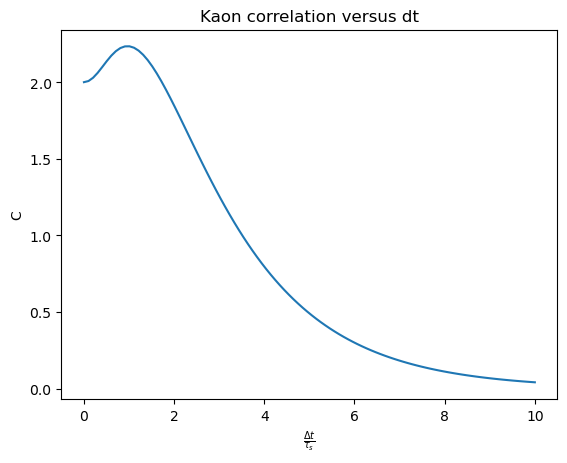

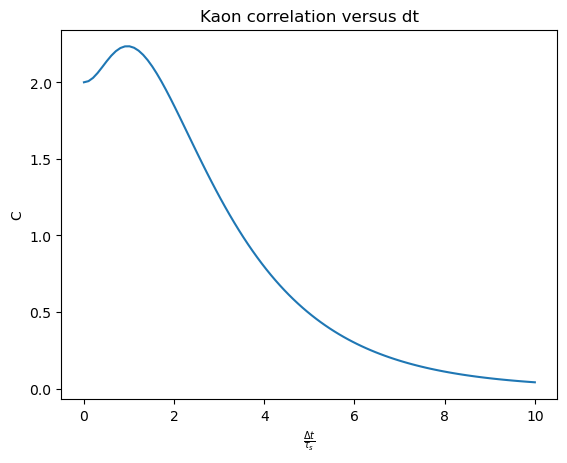

In [8]:
## Graph values of the inequality as described in the paper
# Time scale
t0_max = 10 * tau_S # For reference, from paper
dt_max = 10 * tau_S # For reference, from paper
t0 = tau_S
plot_C_vs_dt(0, dt_max, tau_S, tau_L, DM, re_eps, abs_eps) # With complex parameter
plot_C_vs_dt(0, dt_max, tau_S, tau_L, DM, 0, 0) # No complex parameter

With the scale factor of $\hbar$ removed from the $C$ function, these reflect a shape similar to the known result. However, the contour of the curve is not fully correct, as it is never negative (a defining feature in the paper). This is likely due to a scaling discrepancy in the inputs.


The following applies to the case where $\Gamma$ is defined as $\frac{\hbar}{\tau}$.

Interestingly, this looks absolutely nothing like the proposed $C$ function in the paper. 

Unsurprisingly, in the limit without the CP-violating parameter, the inequality is satisfied, as the value of the overall $C$ is less than or equal to 2. Faithfully to the paper, the inclusion of the parameter does cause the inequality to be violated. However, it does so on a much greater time scale and with a drastically different contour. Let us explore the behavior of the function on further and on a greater time scale to see what it's actually doing.

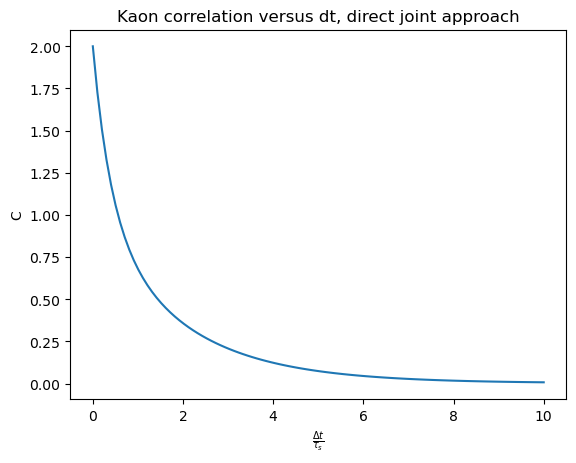

In [9]:
plot_C_Joint_vs_dt(0, dt_max, 1 / tau_S, 1 / tau_L, DM, eps)

* for $\hbar$ case

This does look like the curve in the paper, meaning that there is most likely an error in the units of the equation, which I have as of yet been unable to find. This would also explain why the effect where the amplitude briefly goes beneath zero isn't visible.

Let's try comparing this time scale without the complex parameter.

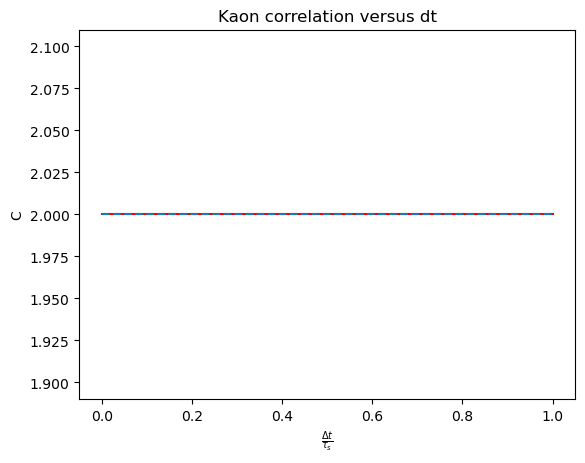

In [10]:
compare_C_CP_violating(0, dt_max / 10, tau_S, tau_L, DM, re_eps, abs_eps) # No longer hbar case

There is a difference but it is less pronounced than it should be, again pointing to a scaling discrepancy.

## B Meson



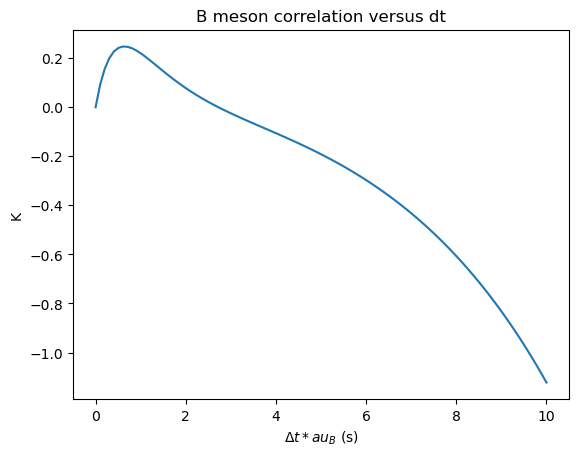

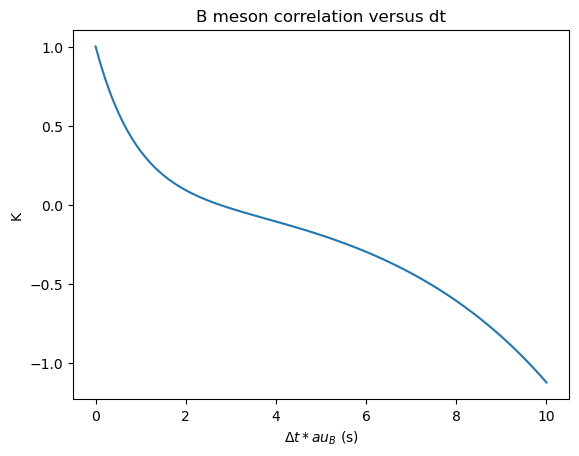

In [11]:
# B Meson
t0_B = 0
dt_max_B = 10 * B_H
plot_B_vs_dt(t0_B, dt_max_B, 1 / B_H, 1 / B_L, B_DM, B_q_over_p) # Complex parameter = 1 (no CP violation)
plot_B_vs_dt(t0_B, dt_max_B, 1 / B_H, 1 / B_L, B_DM, 0) # Complex parameter = 0 (not physical)

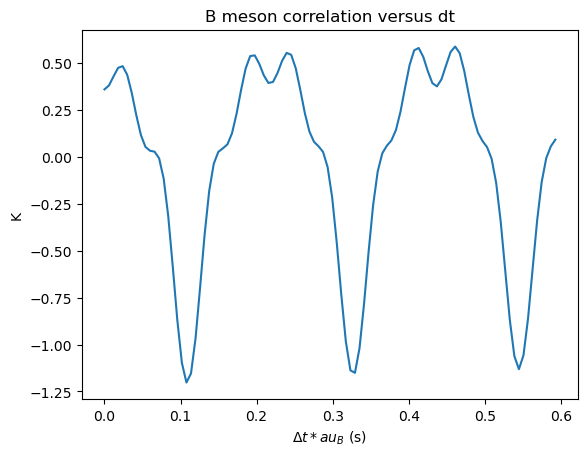

In [12]:
plot_B_vs_dt(t0_B, dt_max_B * 90000000000000, hbar / B_H, hbar / B_L, B_DM, 0.8)

These graphs appear to have a similar issue to the previous ones, so further exploration is being delayed until the issue is resolved.